In [6]:
import pandas as pd
import matplotlib.pyplot as plt
df_ice = pd.read_csv("icecream2.csv")

df_ice

,year,month,icecream
0,2003,1,331
1,2003,2,268
2,2003,3,365
3,2003,4,492
4,2003,5,632
...,...,...,...
115,2012,8,1332
116,2012,9,849
117,2012,10,515
118,2012,11,326


<AxesSubplot:>

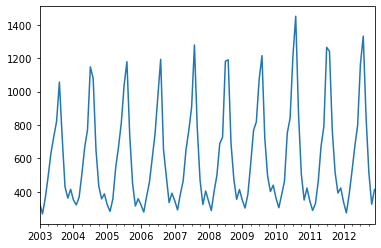

In [7]:
import pandas as pd

# 月ごと
y = pd.Series(df_ice.icecream.values, index=pd.date_range('2003-1', periods=len(df_ice), freq='M'))
y.plot()

In [9]:
from statsmodels.graphics import tsaplots
from statsmodels.tsa import stattools
from statsmodels.tsa import ar_model

# トレンド項あり(2次まで)，定数項ありの場合
ctt = stattools.adfuller(y[:100], regression="ctt")
# トレンド項あり(1次)，定数項ありの場合
ct = stattools.adfuller(y[:100], regression="ct")
# トレンド項なし，定数項ありの場合
c = stattools.adfuller(y[:100], regression="c")
# トレンド項なし，定数項なしの場合
nc = stattools.adfuller(y[:100], regression="nc")
print('ctt:')
print(ctt)
print('ct:')
print(ct)
print('c:')
print(c)
print('nc:')
print(nc)

ctt:
(-3.3089558508822234, 0.16922448619685926, 11, 88, {'1%': -4.507929662788786, '5%': -3.9012866601709244, '10%': -3.595623127758734}, 993.4892589484145)
ct:
(-1.7145601999710802, 0.7444294601457546, 11, 88, {'1%': -4.065513968057382, '5%': -3.4616143302732905, '10%': -3.156971502864388}, 1002.5847722693204)
c:
(-0.6539247687694234, 0.8583259363632656, 11, 88, {'1%': -3.506944401824286, '5%': -2.894989819214876, '10%': -2.584614550619835}, 1003.5884336394024)
nc:
(1.631094917975906, 0.9751761218376865, 11, 88, {'1%': -2.5916151807851238, '5%': -1.944440985689801, '10%': -1.614115063626972}, 1002.1878264328066)


<AxesSubplot:>

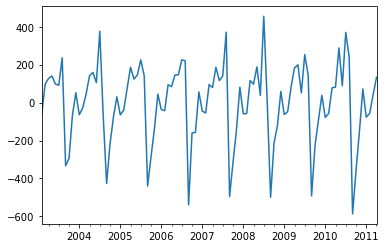

In [8]:
y_diff = y.diff()[:100].dropna()
y_diff.plot()

In [12]:
y_diff.count()

99

In [14]:
from statsmodels.graphics import tsaplots
from statsmodels.tsa import stattools
from statsmodels.tsa import ar_model

for i in range(20):
    model = ar_model.AR(y_diff)
    results = model.fit(maxlag=i+1)
    print(f'lag = {i + 1}\taic : {results.aic}')


lag = 1	aic : 10.623349835083612
lag = 2	aic : 10.605625887136187
lag = 3	aic : 10.631794365499909
lag = 4	aic : 10.653968819566964
lag = 5	aic : 10.639020494849978
lag = 6	aic : 10.497805079154896
lag = 7	aic : 10.50164556083358
lag = 8	aic : 10.347418412668333
lag = 9	aic : 10.145773136713263
lag = 10	aic : 9.547393191591683
lag = 11	aic : 8.688494352586085
lag = 12	aic : 8.726168706454176
lag = 13	aic : 8.749080458269447
lag = 14	aic : 8.787463716774608
lag = 15	aic : 8.822181088075927
lag = 16	aic : 8.861619646480914
lag = 17	aic : 8.900710667979508
lag = 18	aic : 8.712739176754758
lag = 19	aic : 8.74636247304398
lag = 20	aic : 8.766450545272324


<BarContainer object of 88 artists>

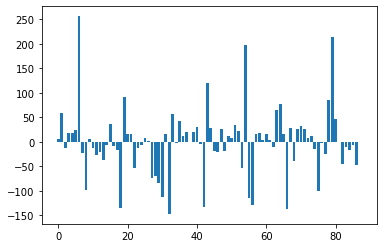

In [16]:
from statsmodels.graphics import tsaplots
from statsmodels.tsa import stattools
from statsmodels.tsa import ar_model

model = ar_model.AR(y_diff)
results11 = model.fit(maxlag=12, ic='aic')
res11 = results11.resid
plt.bar(range(len(res11)), res11)

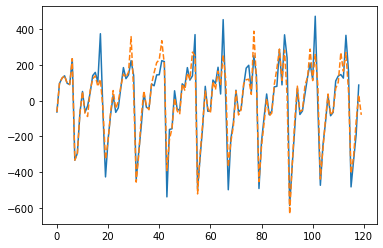

In [18]:
import numpy as np

plt.plot(y.diff().dropna().values, label="observation")

plt.plot(np.hstack((y_diff[:11], 
                    results11.fittedvalues, 
                    results11.predict(98-11, 107, dynamic=True))), '--', label="forecast")